In [16]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import itertools

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

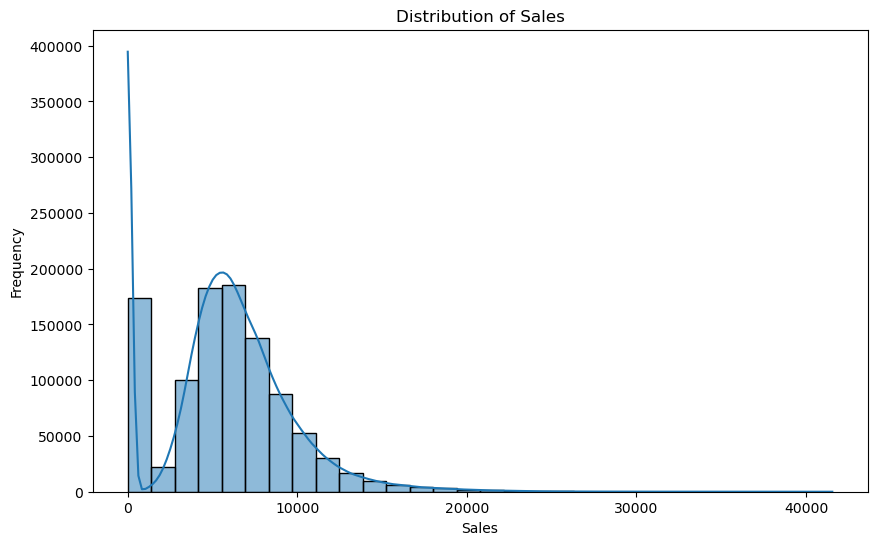

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")
store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")

merged_data = pd.merge(train, store, on='Store')

print(merged_data.info())
print(merged_data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [58]:
# Handle missing values
merged_data['CompetitionDistance'].fillna(merged_data['CompetitionDistance'].median(), inplace=True)
merged_data['CompetitionOpenSinceMonth'].fillna(merged_data['CompetitionOpenSinceMonth'].median(), inplace=True)
merged_data['CompetitionOpenSinceYear'].fillna(merged_data['CompetitionOpenSinceYear'].median(), inplace=True)
merged_data['Promo2SinceWeek'].fillna(merged_data['Promo2SinceWeek'].median(), inplace=True)
merged_data['Promo2SinceYear'].fillna(merged_data['Promo2SinceYear'].median(), inplace=True)
merged_data['PromoInterval'].fillna('None', inplace=True)

# Convert categorical variables into factors
merged_data['StoreType'] = merged_data['StoreType'].astype('category')
merged_data['Assortment'] = merged_data['Assortment'].astype('category')
merged_data['PromoInterval'] = merged_data['PromoInterval'].astype('category')
merged_data['StateHoliday'] = merged_data['StateHoliday'].astype('category')

# Ensure Date is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])


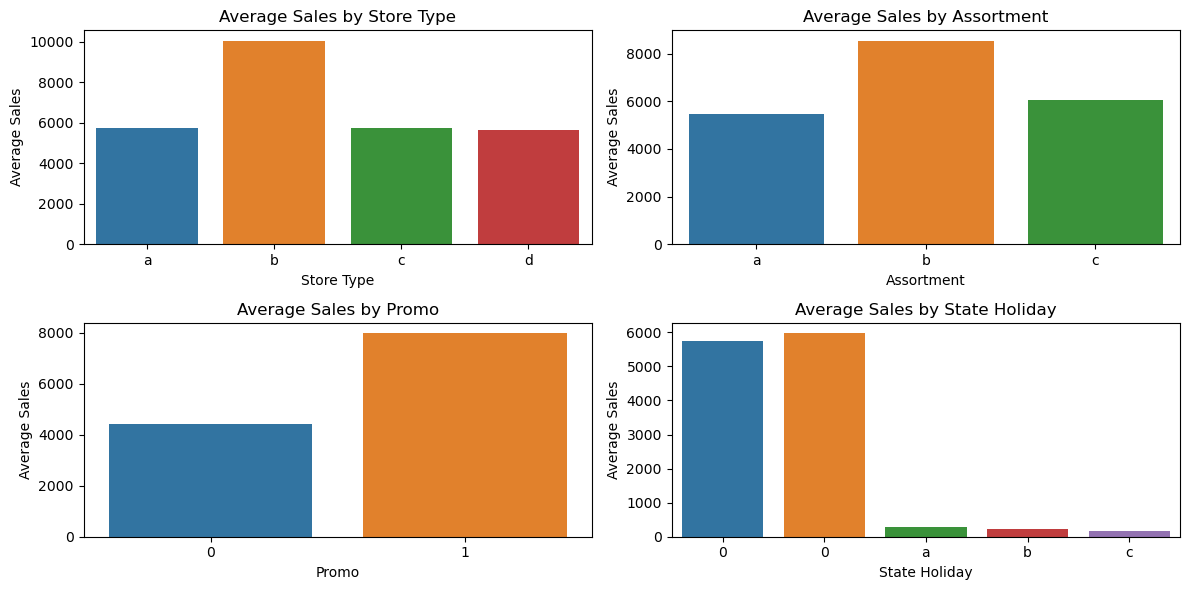

In [24]:
# Aggregate sales by different features
avg_sales_by_store_type = merged_data.groupby('StoreType')['Sales'].mean().reset_index()
avg_sales_by_assortment = merged_data.groupby('Assortment')['Sales'].mean().reset_index()
avg_sales_by_promo = merged_data.groupby('Promo')['Sales'].mean().reset_index()
avg_sales_by_state_holiday = merged_data.groupby('StateHoliday')['Sales'].mean().reset_index()

# Visualize the impact
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(data=avg_sales_by_store_type, x='StoreType', y='Sales')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

plt.subplot(2, 2, 2)
sns.barplot(data=avg_sales_by_assortment, x='Assortment', y='Sales')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales')

plt.subplot(2, 2, 3)
sns.barplot(data=avg_sales_by_promo, x='Promo', y='Sales')
plt.title('Average Sales by Promo')
plt.xlabel('Promo')
plt.ylabel('Average Sales')

plt.subplot(2, 2, 4)
sns.barplot(data=avg_sales_by_state_holiday, x='StateHoliday', y='Sales')
plt.title('Average Sales by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Encode categorical variables
merged_data = pd.get_dummies(merged_data, columns=['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'])

# Split the data into training and testing sets
X = merged_data.drop(['Sales', 'Customers', 'Date'], axis=1)
y = merged_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 2524.1792143096336


In [26]:
# Import necessary libraries
import numpy as np

# Feature Engineering: Add new features
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['WeekOfYear'] = merged_data['Date'].dt.isocalendar().week

# Check for correlation
corr_matrix = merged_data.corr()
print(corr_matrix['Sales'].sort_values(ascending=False))


Sales                             1.000000
Customers                         0.894711
Open                              0.678472
Promo                             0.452345
StoreType_b                       0.139940
StateHoliday_0                    0.123160
PromoInterval_None                0.091040
SchoolHoliday                     0.085124
Assortment_c                      0.068772
Assortment_b                      0.065473
WeekOfYear                        0.052946
Month                             0.048768
Date                              0.041904
Promo2SinceWeek                   0.032521
Year                              0.023519
CompetitionOpenSinceYear          0.010115
Store                             0.005126
StateHoliday_0                   -0.004025
Promo2SinceYear                  -0.004027
StoreType_c                      -0.005140
StoreType_a                      -0.010076
Day                              -0.011612
CompetitionDistance              -0.018870
StoreType_d

In [29]:
# Drop one instance of 'StateHoliday_0'
merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# Define the target and features
X = merged_data.drop(['Sales', 'Customers', 'Date'], axis=1)
y = merged_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error after Feature Engineering:', rmse)

# Interpret the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))


Root Mean Squared Error after Feature Engineering: 2515.218625155412
                                Coefficient
Open                            5455.088526
StoreType_b                     3794.337274
Promo                           2089.159009
Assortment_c                    1437.093971
Assortment_a                     695.087799
PromoInterval_None               320.598943
Year                             174.600716
PromoInterval_Jan,Apr,Jul,Oct    131.886639
SchoolHoliday                    104.306103
Month                             59.624847
Promo2SinceWeek                   16.275806
WeekOfYear                         1.183786
CompetitionOpenSinceYear           0.625077
Store                              0.045589
CompetitionDistance               -0.020001
Day                               -2.771634
Promo2SinceYear                  -29.540374
CompetitionOpenSinceMonth        -29.991943
PromoInterval_Feb,May,Aug,Nov    -90.778639
DayOfWeek                       -150.014199
StateHo

Root Mean Squared Error with XGBoost: 1473.5738827572388


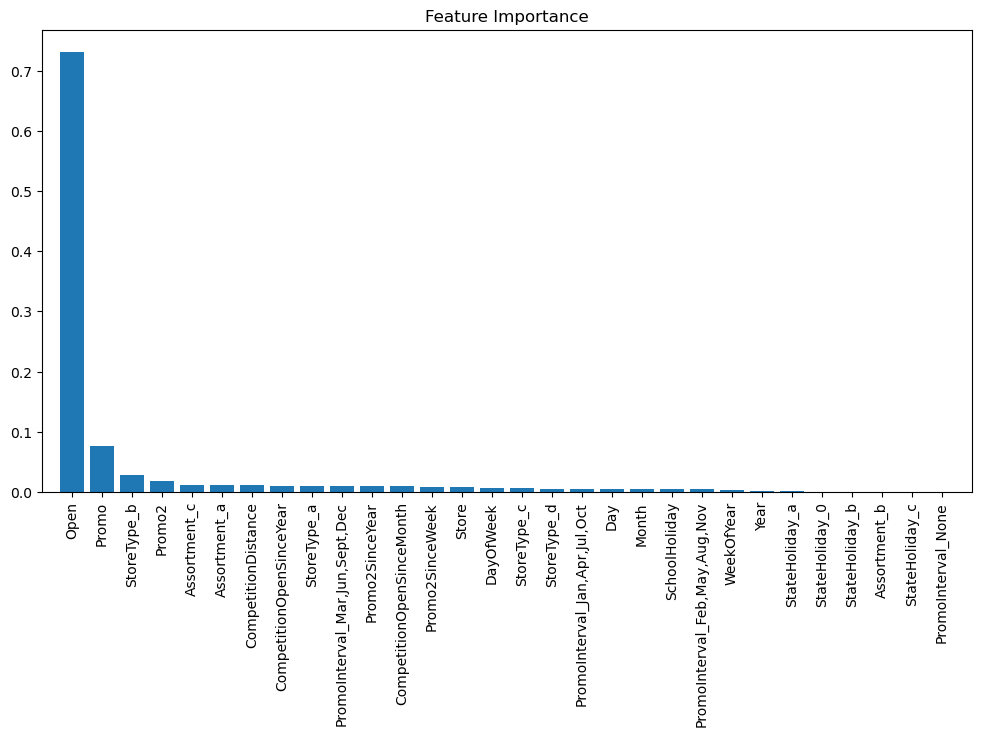

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the target and features
X = merged_data.drop(['Sales', 'Customers', 'Date'], axis=1)
y = merged_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error with XGBoost:', rmse)

# Feature Importance
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



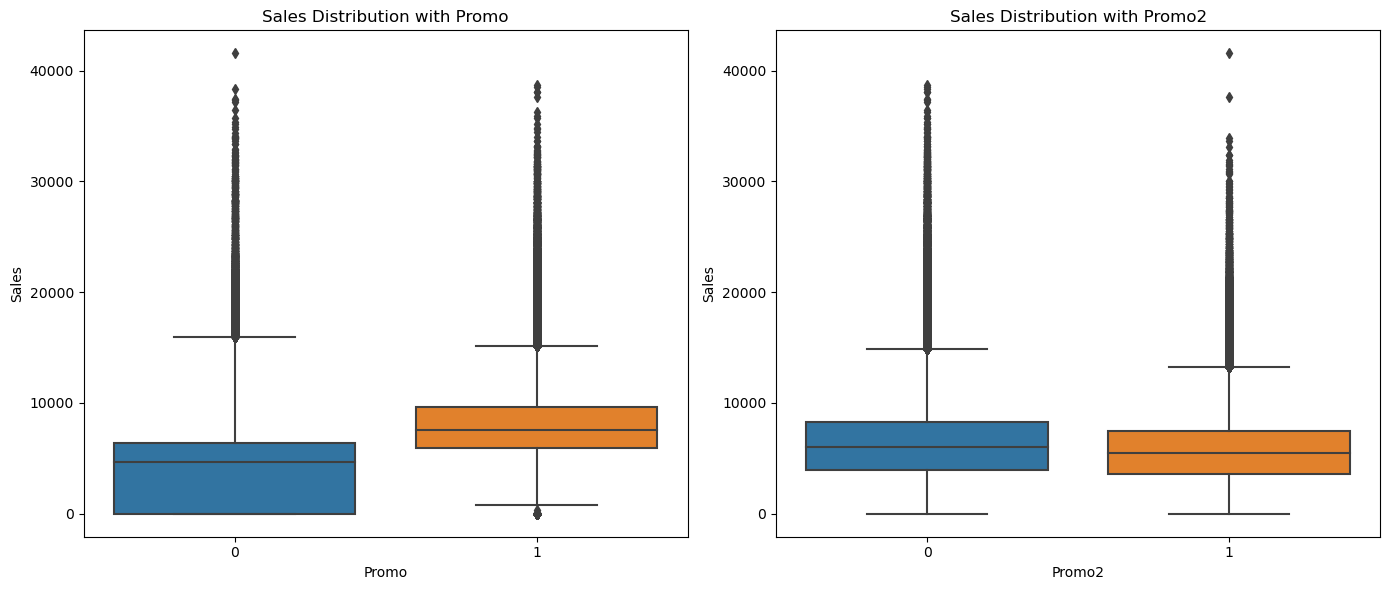

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sales distribution for Promo and Promo2
plt.figure(figsize=(14, 6))

# Sales distribution for Promo
plt.subplot(1, 2, 1)
sns.boxplot(x='Promo', y='Sales', data=merged_data)
plt.title('Sales Distribution with Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

# Sales distribution for Promo2
plt.subplot(1, 2, 2)
sns.boxplot(x='Promo2', y='Sales', data=merged_data)
plt.title('Sales Distribution with Promo2')
plt.xlabel('Promo2')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


In [40]:
avg_sales_promo = merged_data.groupby('Promo')['Sales'].mean().reset_index()
avg_sales_promo2 = merged_data.groupby('Promo2')['Sales'].mean().reset_index()

print("Average Sales with Promo:")
print(avg_sales_promo)

print("Average Sales with Promo2:")
print(avg_sales_promo2)


Average Sales with Promo:
   Promo        Sales
0      0  4406.050805
1      1  7991.152046
Average Sales with Promo2:
   Promo2        Sales
0       0  6124.710161
1       1  5423.718218


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

merged_data = pd.get_dummies(merged_data, columns=['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'])

X = merged_data[['Promo', 'Promo2', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]
y = merged_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))


Root Mean Squared Error: 3412.878666156424
                           Coefficient
Promo                      3590.487890
CompetitionOpenSinceYear      3.667155
CompetitionDistance          -0.016795
CompetitionOpenSinceMonth   -35.362893
Promo2                     -732.037052


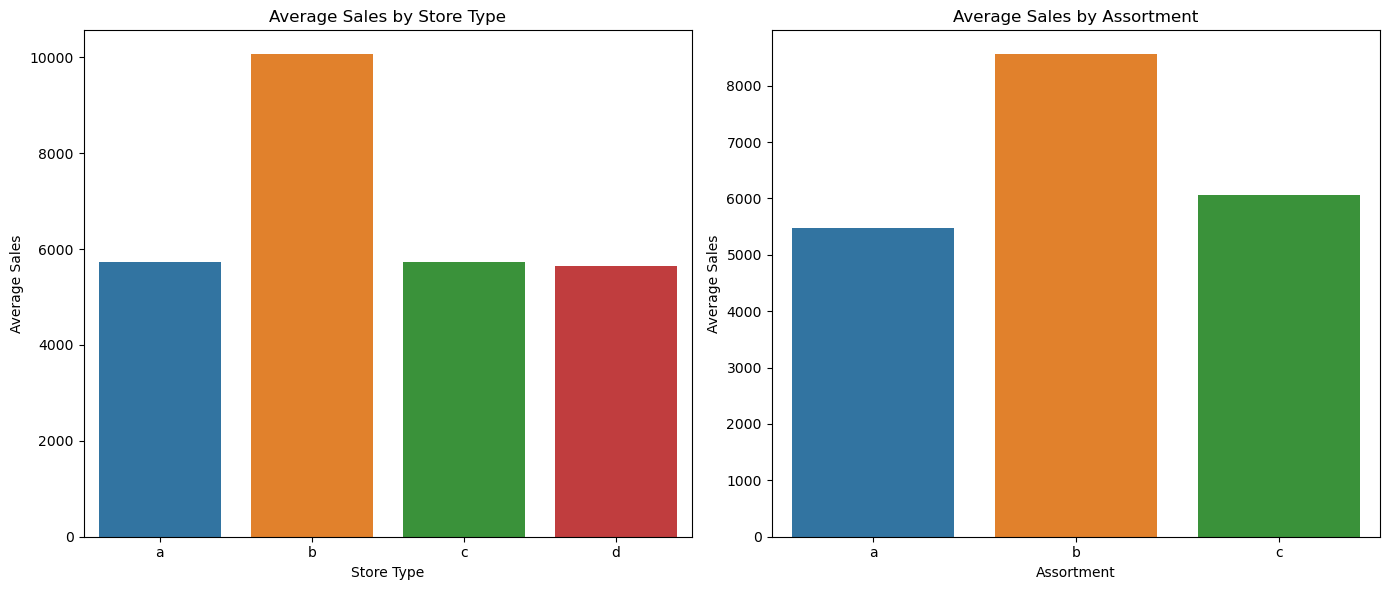

In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")
store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")

# Merge the train and store datasets
merged_data = pd.merge(train, store, on='Store')

# Aggregate sales by StoreType and Assortment
avg_sales_by_store_type = merged_data.groupby('StoreType')['Sales'].mean().reset_index()
avg_sales_by_assortment = merged_data.groupby('Assortment')['Sales'].mean().reset_index()

#
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=avg_sales_by_store_type, x='StoreType', y='Sales')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=avg_sales_by_assortment, x='Assortment', y='Sales')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


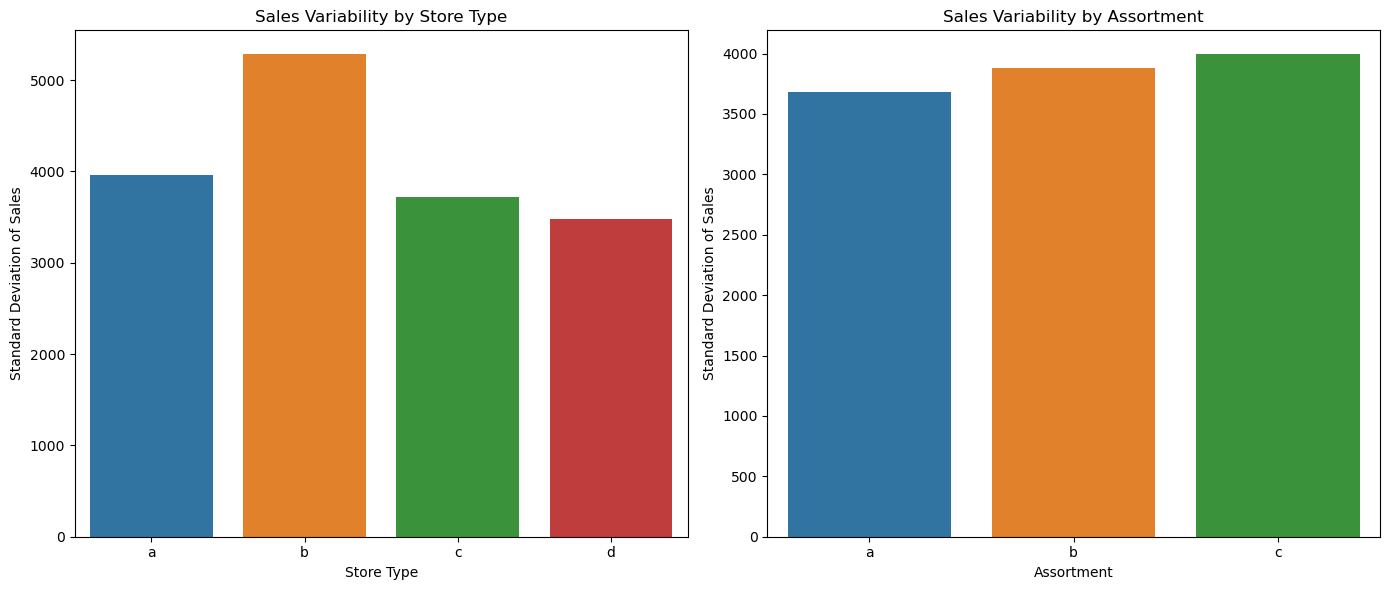

In [43]:
# Calculate sales variability (standard deviation) by StoreType and Assortment
std_sales_by_store_type = merged_data.groupby('StoreType')['Sales'].std().reset_index()
std_sales_by_assortment = merged_data.groupby('Assortment')['Sales'].std().reset_index()

# Visualize the variability
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=std_sales_by_store_type, x='StoreType', y='Sales')
plt.title('Sales Variability by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Standard Deviation of Sales')

plt.subplot(1, 2, 2)
sns.barplot(data=std_sales_by_assortment, x='Assortment', y='Sales')
plt.title('Sales Variability by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Standard Deviation of Sales')

plt.tight_layout()
plt.show()


In [60]:
print(merged_data.dtypes)


Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                       category
SchoolHoliday                         int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                      category
StoreType_a                            bool
StoreType_b                            bool
StoreType_c                            bool
StoreType_d                            bool
Assortment_a                           bool
Assortment_b                           bool
Assortment_c                    

In [68]:
import numpy as np
import pandas as pd
from datetime import datetime
train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")  
test = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/test.csv")    
store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")  

In [69]:
print(store.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [70]:
print(train.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [71]:
print(test.head())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0


In [6]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
print(train.isnull().sum())
print(store.isnull().sum())

merged_data = train.merge(store, on='Store', how='left')

merged_data.head()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


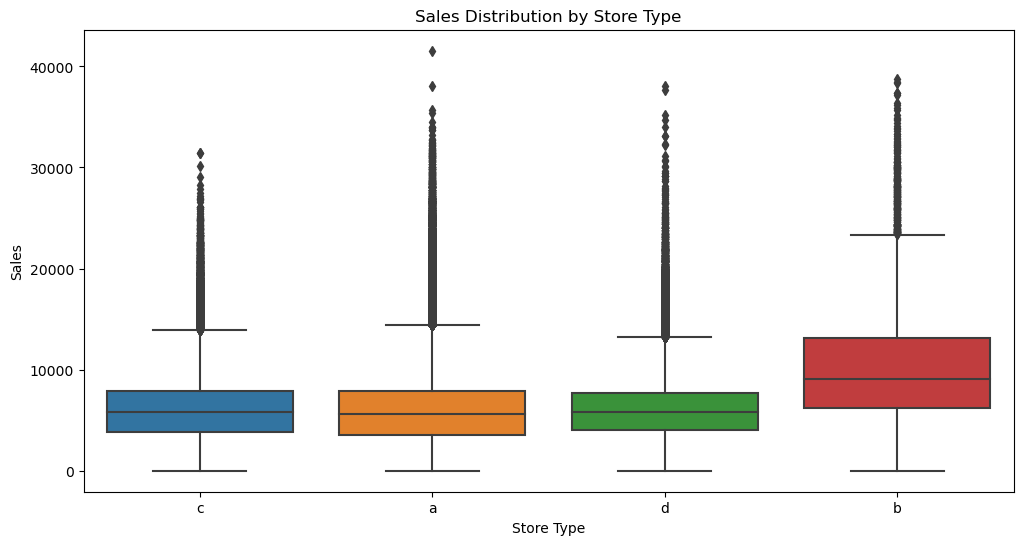

In [8]:
# Plot sales distribution by store type
plt.figure(figsize=(12, 6))
sns.boxplot(x='StoreType', y='Sales', data=merged_data)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


In [107]:
import numpy as np
import pandas as pd
from datetime import datetime
train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")  
test = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/test.csv")    
store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")  

In [108]:

# 3. Merging Datasets
train_merged = train.merge(store, on='Store', how='left')

# 4. Handling Missing Values

train_merged['CompetitionDistance'].fillna(train_merged['CompetitionDistance'].median(), inplace=True)
train_merged[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']] = train_merged[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].fillna(0)
train_merged[['Promo2SinceYear', 'Promo2SinceWeek']] = train_merged[['Promo2SinceYear', 'Promo2SinceWeek']].fillna(0)
train_merged['PromoInterval'].fillna('No Promo', inplace=True)


In [92]:
# 5. Converting Date Column to Datetime Format
train_merged['Date'] = pd.to_datetime(train_merged['Date'])


In [93]:
# 6. Feature Engineering
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Day'] = train_merged['Date'].dt.day
train_merged['WeekOfYear'] = train_merged['Date'].dt.isocalendar().week
train_merged['DayOfWeek'] = train_merged['Date'].dt.dayofweek


In [94]:
# 7. Encoding Categorical Variables
train_merged['StoreType'] = train_merged['StoreType'].astype('category').cat.codes
train_merged['Assortment'] = train_merged['Assortment'].astype('category').cat.codes
train_merged['StateHoliday'] = train_merged['StateHoliday'].astype('category').cat.codes
train_merged['PromoInterval'] = train_merged['PromoInterval'].astype('category').cat.codes


In [10]:
# 8. Dropping Unnecessary Columns
train_merged.drop([ 'Customers', 'Date'], axis=1, inplace=True)


In [29]:
# 9. Splitting the Data into Features and Target Variable
X = train_merged.drop('Sales', axis=1)  # Features
y = train_merged['Sales']                 # Target variable


In [30]:
# 10. Splitting the Data into Training and Validation Sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Output Data Summary
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)


Training Features Shape: (813767, 21)
Validation Features Shape: (203442, 21)
Training Target Shape: (813767,)
Validation Target Shape: (203442,)


In [80]:
# 1. Basic Data Overview
print("Shape of the dataset:", train_merged.shape)
print("Data Types:\n", train_merged.dtypes)
print("Sample Records:\n", train_merged.head())


Shape of the dataset: (1017209, 28)
Data Types:
 Store                                 int64
DayOfWeek                             int32
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
SchoolHoliday                         int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                          int8
Year                                  int32
Month                                 int32
Day                                   int32
WeekOfYear                           UInt32
StoreType_1                            bool
StoreType_2                            bool
StoreType_3                

In [95]:
# Count missing values
missing_values = train_merged.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 Series([], dtype: int64)


In [96]:
# Count the number of days with zero sales
zero_sales_count = train_merged[train_merged['Sales'] == 0].shape[0]
print(f"Number of days with zero sales: {zero_sales_count}")

# Analyze zero sales by store
zero_sales_by_store = train_merged[train_merged['Sales'] == 0]['Store'].value_counts()
print("Zero Sales by Store:\n", zero_sales_by_store)

# Analyze dates with zero sales
zero_sales_dates = train_merged[train_merged['Sales'] == 0]['Date'].value_counts()
print("Dates with Zero Sales:\n", zero_sales_dates.head(10))  # Display the first 10 dates


Number of days with zero sales: 172871
Zero Sales by Store:
 Store
103    311
708    255
349    242
972    240
674    197
      ... 
948     15
512     13
353     12
259     11
274     10
Name: count, Length: 1105, dtype: int64
Dates with Zero Sales:
 Date
2013-03-29    1099
2015-02-22    1098
2014-02-09    1098
2013-12-25    1098
2013-12-01    1098
2013-11-24    1098
2013-11-17    1098
2013-11-10    1098
2014-01-12    1098
2015-04-03    1098
Name: count, dtype: int64


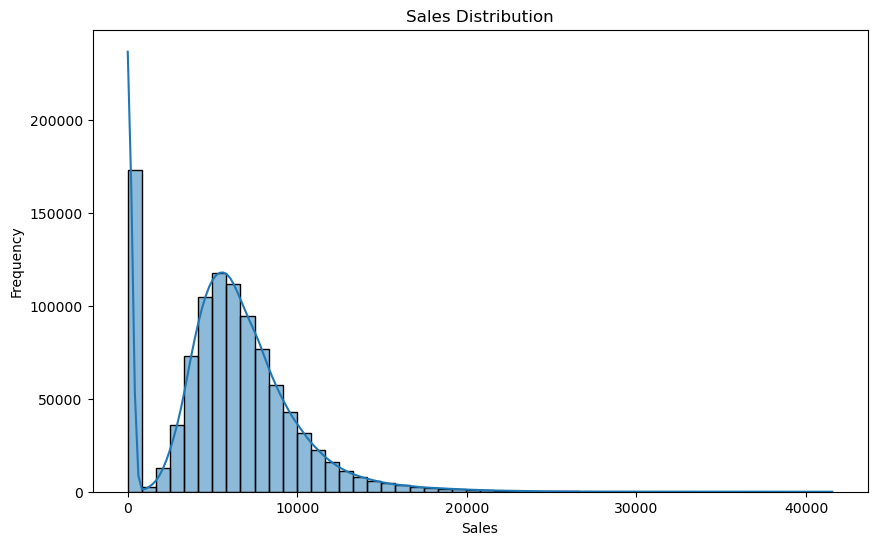

In [84]:
# 4. Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_merged['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


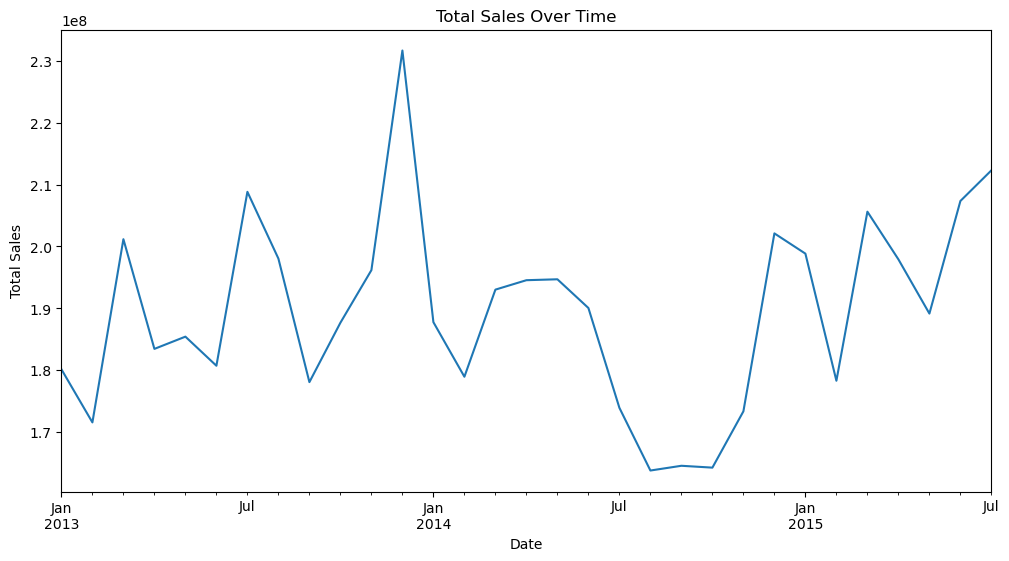

In [102]:
# 5. Time Series Analysis
train_merged.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
train_merged['Sales'].resample('M').sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [104]:

train_merged.reset_index(inplace=True)


In [64]:

store_type_sales = merged_data.groupby('StoreType')['Sales'].mean().reset_index()

print(store_type_sales)


  StoreType         Sales
0         a   5738.179710
1         b  10058.837334
2         c   5723.629246
3         d   5641.819243


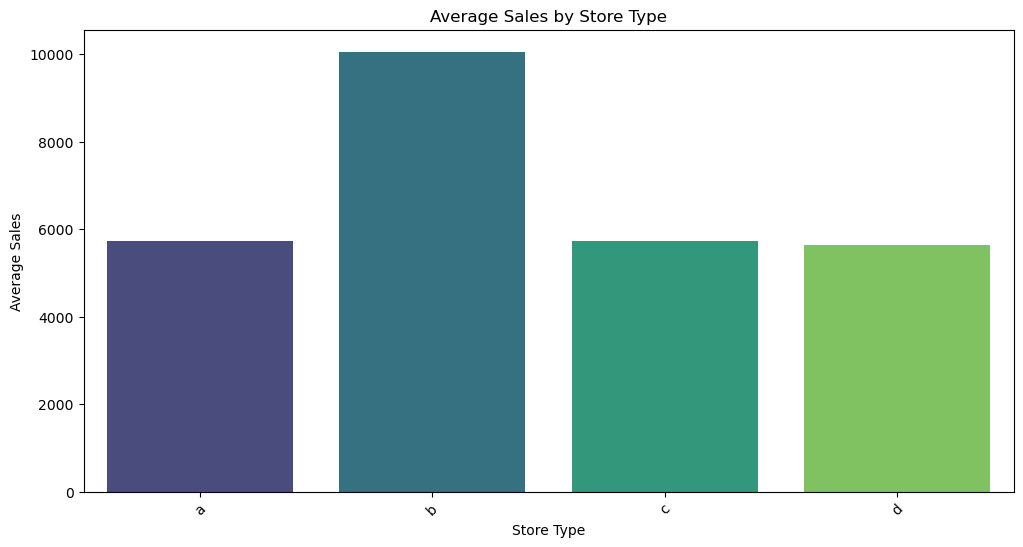

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average sales by store type
plt.figure(figsize=(12, 6))
sns.barplot(x='StoreType', y='Sales', data=store_type_sales, palette='viridis')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


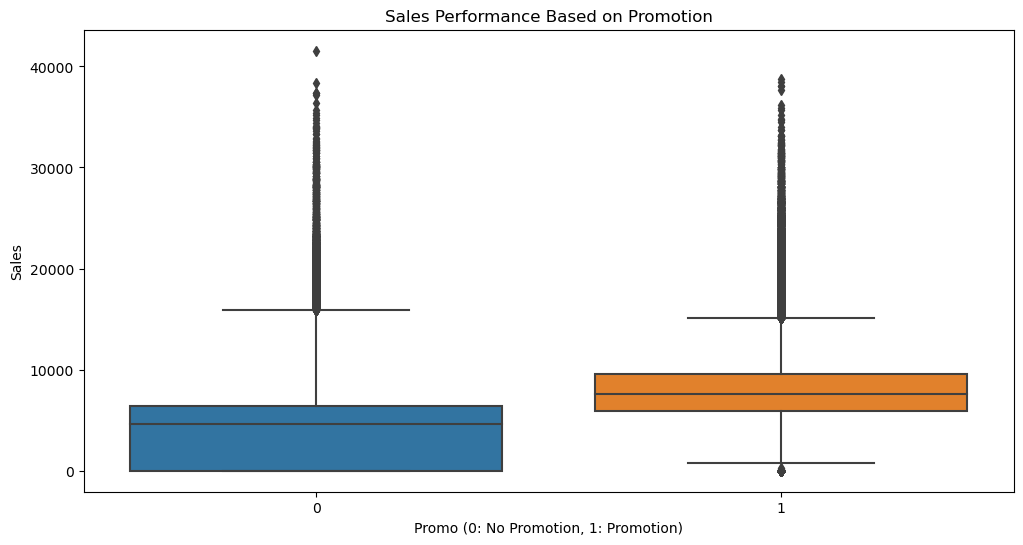

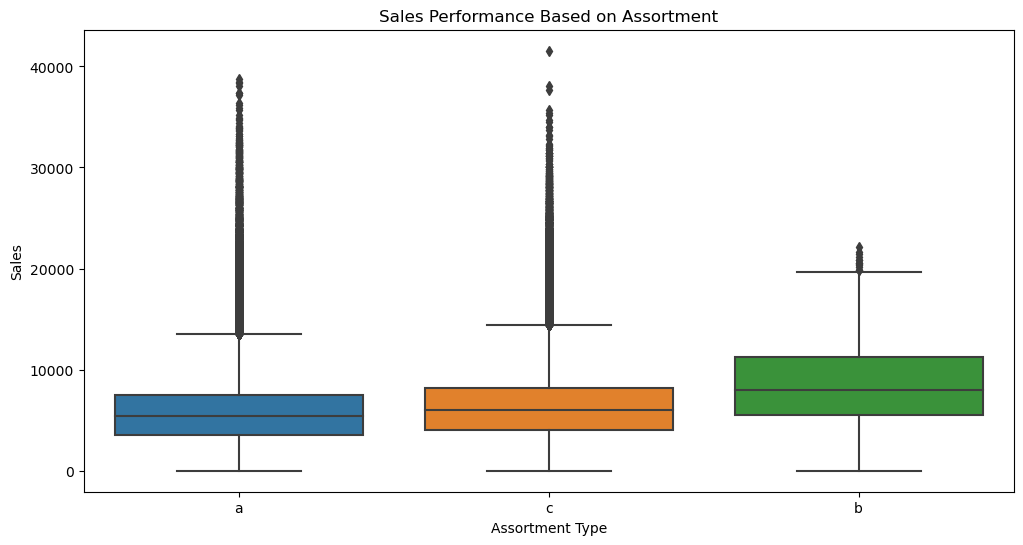

In [66]:
# Analyzing the impact of Promotion on Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promo', y='Sales', data=merged_data)
plt.title('Sales Performance Based on Promotion')
plt.xlabel('Promo (0: No Promotion, 1: Promotion)')
plt.ylabel('Sales')
plt.show()

# Analyzing the impact of Assortment on Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Assortment', y='Sales', data=merged_data)
plt.title('Sales Performance Based on Assortment')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()


In [67]:
# Calculate average sales based on promotion status
promo_sales = merged_data.groupby('Promo')['Sales'].mean().reset_index()
promo_sales['Promo'] = promo_sales['Promo'].map({0: 'No Promotion', 1: 'Promotion'})

# Display average sales
print(promo_sales)


          Promo        Sales
0  No Promotion  4406.050805
1     Promotion  7991.152046


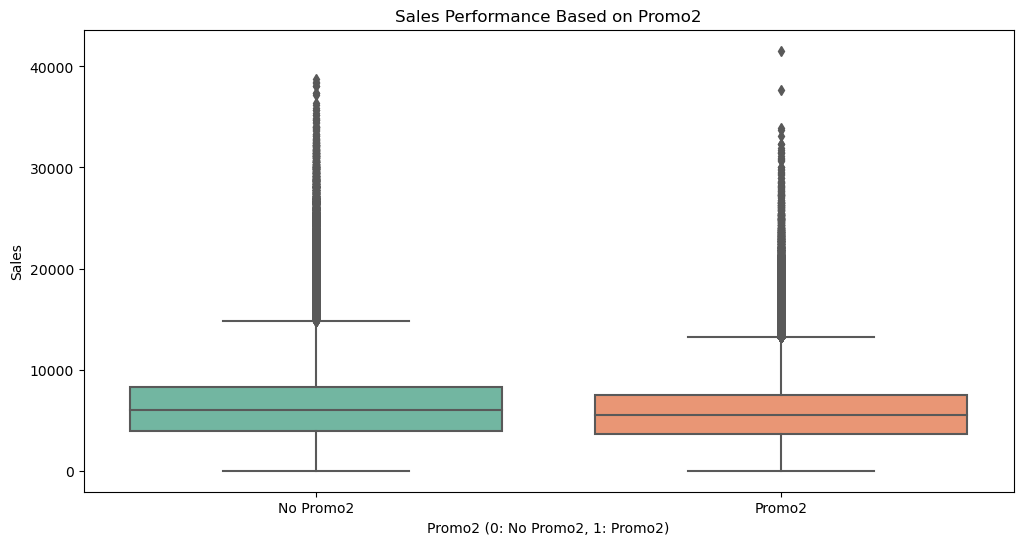

In [71]:
# Boxplot to analyze sales performance based on Promo2 status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promo2', y='Sales', data=merged_data, palette='Set2')
plt.title('Sales Performance Based on Promo2')
plt.xlabel('Promo2 (0: No Promo2, 1: Promo2)')
plt.ylabel('Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo2', 'Promo2'])
plt.show()



In [72]:
# Calculate average sales based on Promo2 status
promo2_sales = merged_data.groupby('Promo2')['Sales'].mean().reset_index()
promo2_sales['Promo2'] = promo2_sales['Promo2'].map({0: 'No Promo2', 1: 'Promo2'})

# Display average sales
print(promo2_sales)


      Promo2        Sales
0  No Promo2  6124.710161
1     Promo2  5423.718218


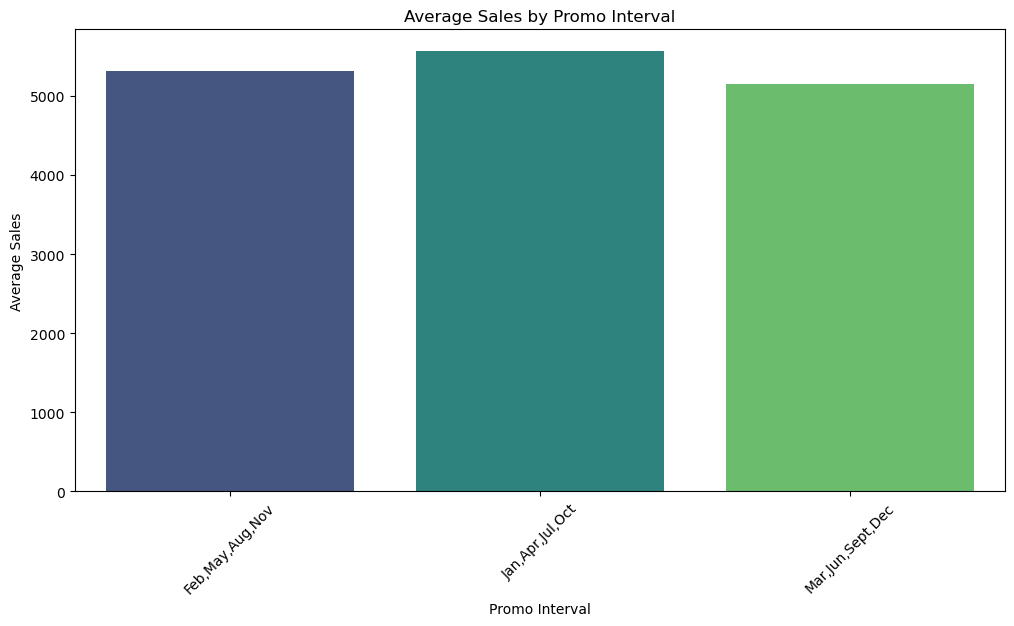

In [73]:
# Analyze average sales by PromoInterval
promo_interval_sales = merged_data.groupby('PromoInterval')['Sales'].mean().reset_index()

# Plot average sales by Promo Interval
plt.figure(figsize=(12, 6))
sns.barplot(x='PromoInterval', y='Sales', data=promo_interval_sales, palette='viridis')
plt.title('Average Sales by Promo Interval')
plt.xlabel('Promo Interval')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


In [75]:
# Assuming optimal stock level is equal to predicted sales
merged_data['Optimal_Stock_Level'] = merged_data['Predicted_Sales']


In [78]:


# Display the first few rows to check
print(merged_data[['Store', 'Optimal_Stock_Level']].head())


   Store  Optimal_Stock_Level
0      1          3225.222500
1      2          4431.929157
2      3          6177.600226
3      4          8358.317163
4      5          4510.329631


In [80]:
# Map StateHoliday values to indicate if a day is a holiday
merged_data['Is_Holiday'] = merged_data['StateHoliday'].map({0: 'No Holiday', 1: 'Holiday'})

# Calculate average sales for holiday vs non-holiday
holiday_sales = merged_data.groupby('Is_Holiday')['Sales'].mean().reset_index()

# Display average sales
print(holiday_sales)


   Is_Holiday        Sales
0  No Holiday  5733.530624


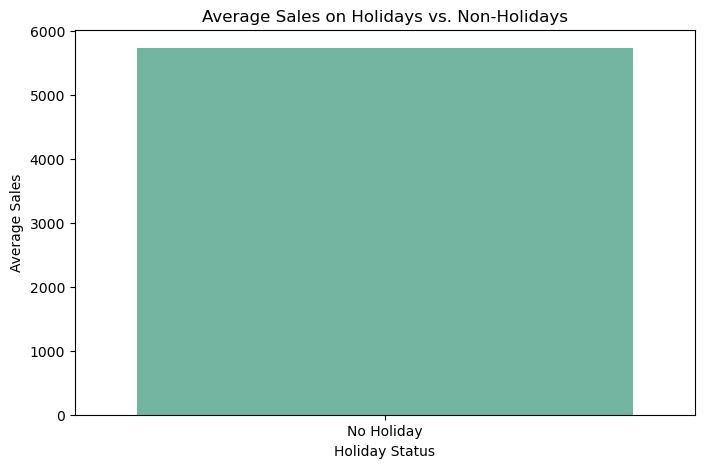

In [81]:
# Bar plot for holiday sales comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_Holiday', y='Sales', data=holiday_sales, palette='Set2')
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.ylabel('Average Sales')
plt.xlabel('Holiday Status')
plt.show()


   Is_School_Holiday        Sales
0  No School Holiday  5620.979034
1     School Holiday  6476.522207


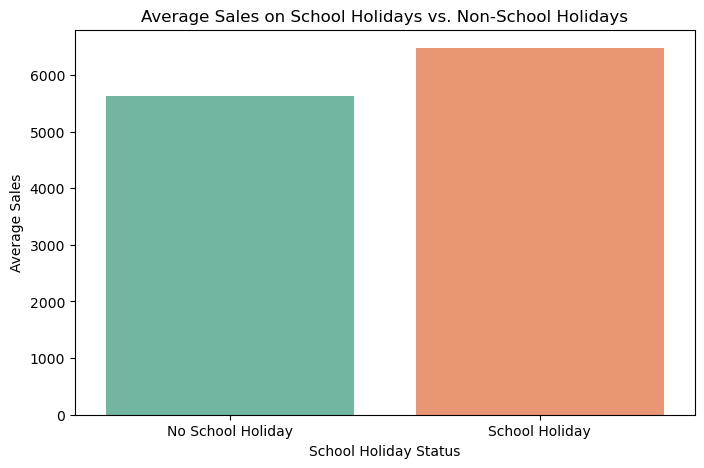

In [82]:
# Map SchoolHoliday values to indicate if a day is a school holiday
merged_data['Is_School_Holiday'] = merged_data['SchoolHoliday'].map({0: 'No School Holiday', 1: 'School Holiday'})

# Calculate average sales for school holiday vs non-school holiday
school_holiday_sales = merged_data.groupby('Is_School_Holiday')['Sales'].mean().reset_index()

# Display average sales
print(school_holiday_sales)

# Bar plot for school holiday sales comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Is_School_Holiday', y='Sales', data=school_holiday_sales, palette='Set2')
plt.title('Average Sales on School Holidays vs. Non-School Holidays')
plt.ylabel('Average Sales')
plt.xlabel('School Holiday Status')
plt.show()


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a list of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R²': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 813767, number of used features: 10
[LightGBM] [Info] Start training from score 5844.315807
                          MAE           MSE        R²
Linear Regression  946.213053  1.931071e+06  0.861691
Random Forest      884.690044  1.827747e+06  0.869091
Gradient Boosting  861.237756  1.663238e+06  0.880874
XGBoost            857.184078  1.678818e+06  0.879758
LightGBM           857.332167  1.673843e+06  0.880114


In [89]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lgb_model.predict(X_train)

# Calculate performance metrics on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Performance Metrics:\n MAE: {mae_train}\n MSE: {mse_train}\n R²: {r2_train}\n")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 813767, number of used features: 10
[LightGBM] [Info] Start training from score 5844.315807
Training Performance Metrics:
 MAE: 904.6804627264726
 MSE: 1885679.8288069381
 R²: 0.8743889139624942



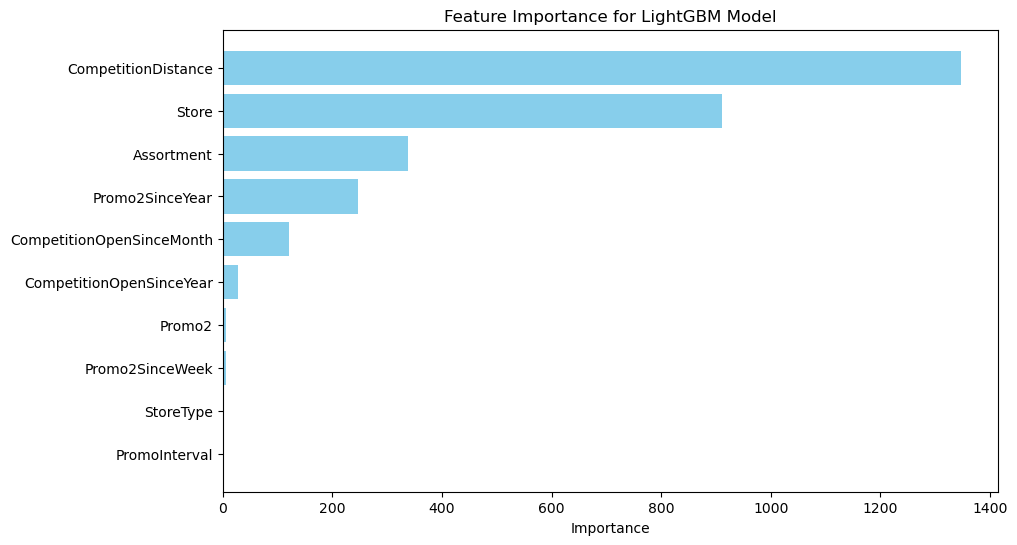

In [93]:


import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train is a NumPy array and you have these feature names
feature_names = [
    'Store', 'StoreType', 'Assortment', 'CompetitionDistance', 
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 
    'PromoInterval'
]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for LightGBM Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
import numpy as np
import pandas as pd
from datetime import datetime
train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")  
test = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/test.csv")    
store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")  

In [178]:
df_train=train.merge(store,on="Store",how="inner")

df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [179]:

df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [180]:
df_train.loc[df_train.duplicated(keep=False), :]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [181]:
df_train.shape

(1017209, 18)

In [182]:
df_train["Date"]=pd.to_datetime(df_train["Date"],infer_datetime_format=True)
df_train["Day"]=df_train["Date"].dt.day
df_train["Week"]=df_train["Date"].dt.isocalendar().week
df_train["Month"]=df_train["Date"].dt.month
df_train["Year"]=df_train["Date"].dt.year

# Seasons:
df_train["Season"]=np.where(df_train["Month"].isin([3,4,5]),"Spring",
                           np.where(df_train["Month"].isin([6,7,8]),"Summer",
                                   np.where(df_train["Month"].isin([9,10,11]),"Autumn",
                                           np.where(df_train["Month"].isin([12,1,2]),"Winter","None"))))

df_train[["Date","Day","Week","Month","Year","Season"]].head(20)

,Date,Day,Week,Month,Year,Season
0,2015-07-31,31,31,7,2015,Summer
1,2015-07-31,31,31,7,2015,Summer
2,2015-07-31,31,31,7,2015,Summer
3,2015-07-31,31,31,7,2015,Summer
4,2015-07-31,31,31,7,2015,Summer
5,2015-07-31,31,31,7,2015,Summer
6,2015-07-31,31,31,7,2015,Summer
7,2015-07-31,31,31,7,2015,Summer
8,2015-07-31,31,31,7,2015,Summer
9,2015-07-31,31,31,7,2015,Summer


In [183]:
df_train["Year"].value_counts()

Year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64

In [184]:
df_train["Store"].unique() 

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [185]:
df_train[df_train.CompetitionDistance.isnull()].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Season
290,291,5,2015-07-31,10052,973,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,31,31,7,2015,Summer
621,622,5,2015-07-31,6306,540,1,1,0,1,a,...,NaN,0,NaN,NaN,NaN,31,31,7,2015,Summer
878,879,5,2015-07-31,6000,466,1,1,0,0,d,...,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",31,31,7,2015,Summer
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,30,31,7,2015,Summer
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,...,NaN,0,NaN,NaN,NaN,30,31,7,2015,Summer


In [186]:
store_id=df_train[df_train.CompetitionDistance.isnull()]["Store"].unique().tolist()

for i in store_id:
    print("Store Id: {}".format(i))
    print("len values: ",len(df_train[df_train["Store"]==i]["CompetitionDistance"]))
    print("missing value: ",df_train[df_train["Store"]==i]["CompetitionDistance"].isnull().sum())
    print("-"*20)

Store Id: 291
len values:  942
missing value:  942
--------------------
Store Id: 622
len values:  942
missing value:  942
--------------------
Store Id: 879
len values:  758
missing value:  758
--------------------


In [187]:
df_train["CompetitionDistance"]=df_train["CompetitionDistance"].fillna(df_train["CompetitionDistance"].mode()[0])

In [188]:
df_train.isnull().sum()/len(df_train)

Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.000000
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
Day                          0.000000
Week                         0.000000
Month                        0.000000
Year                         0.000000
Season                       0.000000
dtype: float64

In [189]:
store_id2=df_train[df_train.CompetitionOpenSinceMonth.isnull()]["Store"].unique().tolist()

for i in store_id2[:8]:
    print("Store Id: {}".format(i))
    print("len values: ",len(df_train[df_train["Store"]==i]["CompetitionOpenSinceMonth"]))
    print("missing value: ",df_train[df_train["Store"]==i]["CompetitionOpenSinceMonth"].isnull().sum())
    print("-"*20)

Store Id: 12
len values:  942
missing value:  942
--------------------
Store Id: 13
len values:  758
missing value:  758
--------------------
Store Id: 16
len values:  942
missing value:  942
--------------------
Store Id: 19
len values:  942
missing value:  942
--------------------
Store Id: 22
len values:  758
missing value:  758
--------------------
Store Id: 26
len values:  942
missing value:  942
--------------------
Store Id: 29
len values:  942
missing value:  942
--------------------
Store Id: 32
len values:  758
missing value:  758
--------------------


In [190]:
df_train[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]]=df_train[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].fillna(0)
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
dtype: int64

In [143]:
df_train[df_train["Promo2"]==1][["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].isnull().sum()

Store              0
Promo2             0
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

In [144]:
df_train[["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]]=df_train[["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].fillna(0)
df_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
dtype: int64

In [191]:
print("Total number of stores: {}".format(len(df_train["Store"].unique())))
print("Average daily sales amount: {}".format(round(df_train["Sales"].mean(),2)))
print("Average daily sales per store: {}".format(round(df_train["Sales"].mean(),2)/len(df_train["Store"].unique())))

Total number of stores: 1115
Average daily sales amount: 5773.82
Average daily sales per store: 5.178313901345291


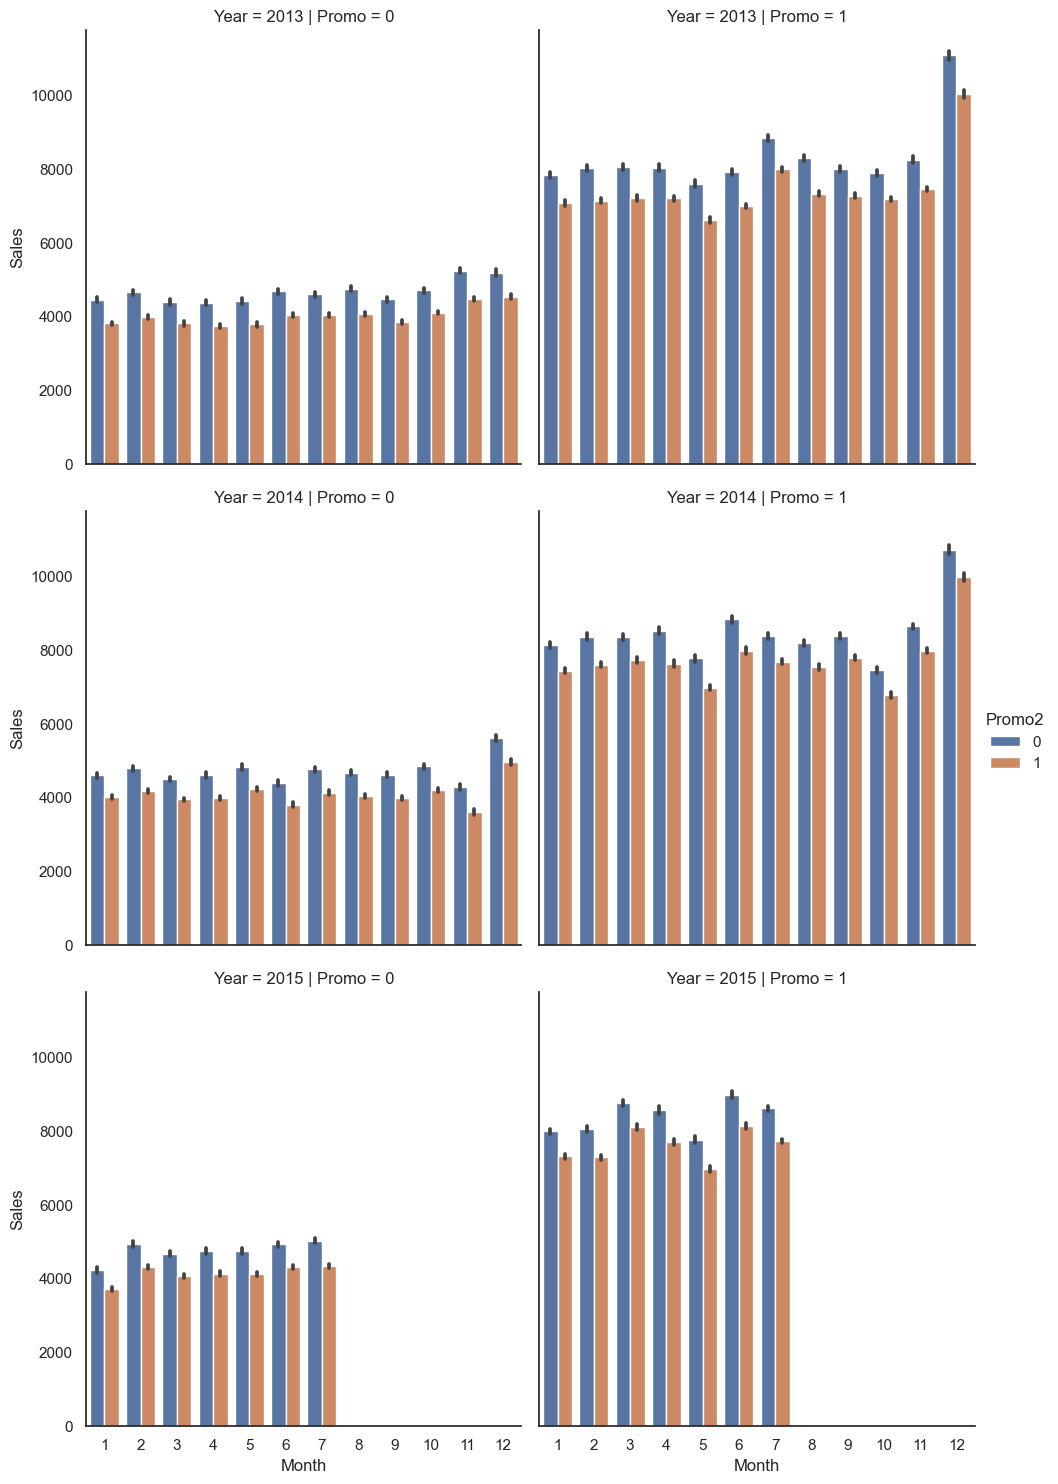

In [192]:
sns.catplot(data = df_train, x='Month', y='Sales',
              col ='Promo', hue='Promo2', row='Year', kind="bar")
plt.show()


We see that the campaigns carried out by the stores themselves and the campaigns jointly organized by the company have an increasing effect on sales.
Strong sales are achieved when participating in the corporate campaign in the last month of the year.

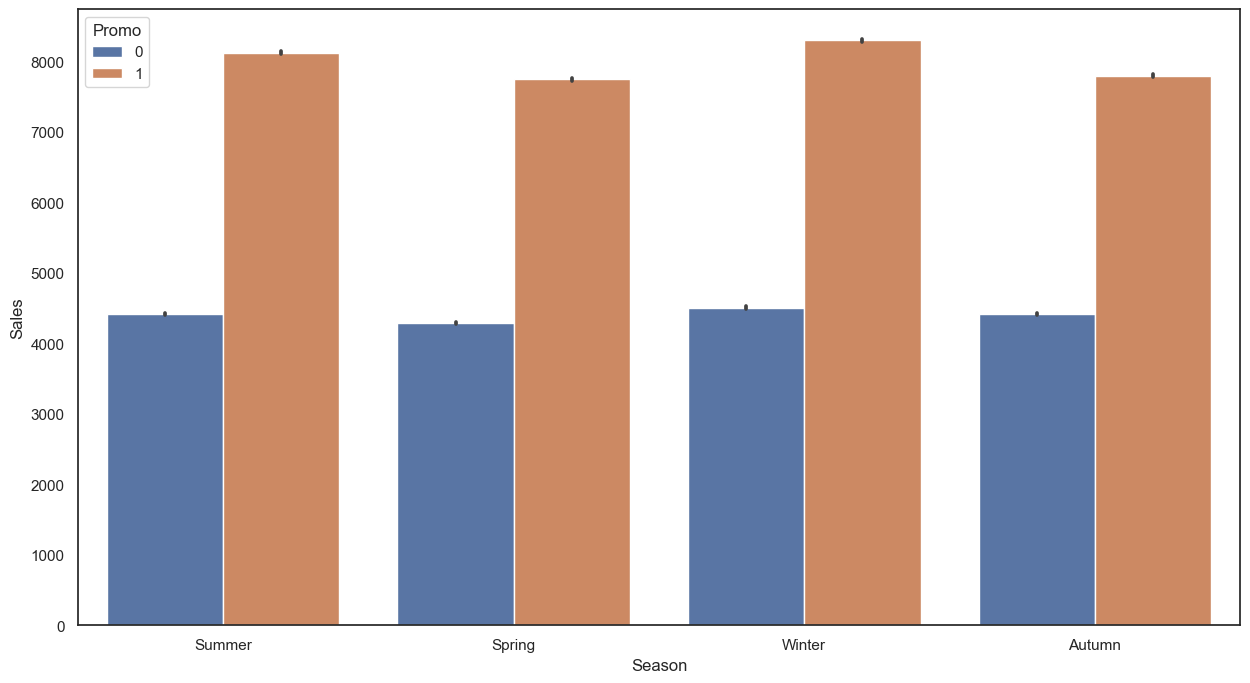

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(x="Season",y="Sales",data=df_train, hue="Promo")
plt.show()


There are more sales in summer and winter months. But there is no clear distinction.

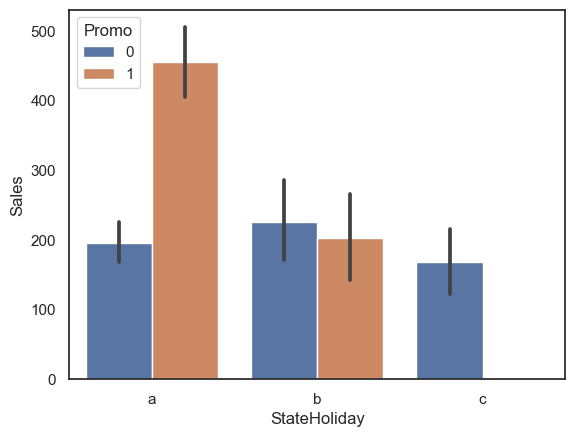

In [148]:
special_days_sales=df_train[df_train["StateHoliday"].isin(["a","b","c"])]
sns.barplot(x="StateHoliday",y="Sales",hue="Promo",data=special_days_sales);

Public holidays are repeated more frequently throughout the year than other holidays. Therefore, the highest sales volume occurs on public holidays and running campaigns has a positive effect on increasing sales.

In [149]:
df_train["CompetitionOpen"]=12*(df_train["Year"]-df_train["CompetitionOpenSinceYear"])+(df_train["Month"]-df_train["CompetitionOpenSinceMonth"])
# We converted the year to month and added the month values.
df_train["PromoOpen"]=12*(df_train["Year"]-df_train["Promo2SinceYear"])+(df_train["Week"]-df_train["Promo2SinceWeek"])/4.0

<Figure size 1500x1200 with 0 Axes>

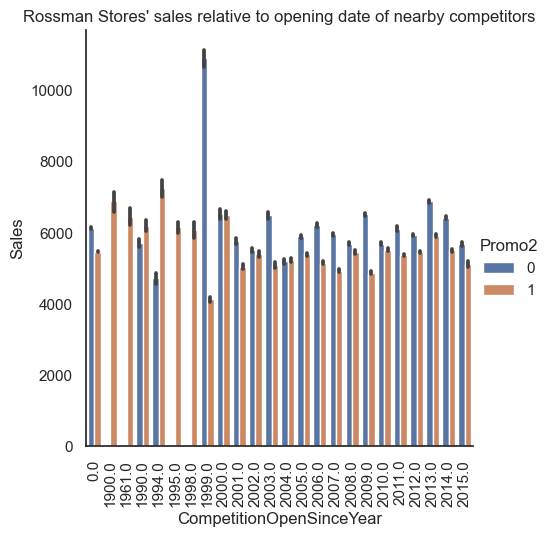

In [150]:
plt.figure(figsize=(15,12))
sns.catplot(data = df_train, x='CompetitionOpenSinceYear', y='Sales', hue='Promo2', kind="bar")
plt.xticks(rotation=90)
plt.title("Rossman Stores' sales relative to opening date of nearby competitors")
plt.show()

Rossman stores close to rival stores that have been in service for many years can increase their market share when they run campaigns.
We can say that the competitive situation is strong against stores established after 1999

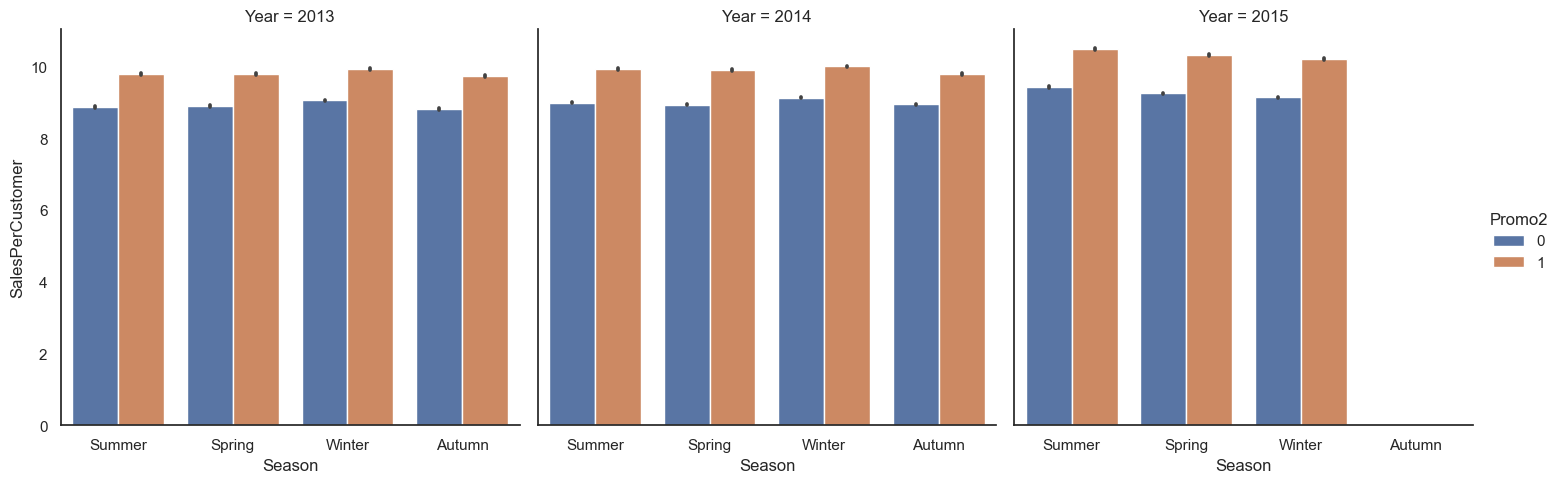

In [151]:
df_train["SalesPerCustomer"]=df_train["Sales"]/df_train["Customers"]

sns.catplot(data = df_train, x='Season', y='SalesPerCustomer', hue='Promo2', col='Year', kind="bar")
plt.show()

There has been an increase in sales per customer in the last year.

In [152]:
df_not_oppen=df_train[df_train.Open==0]
df_not_oppen[(df_not_oppen["Sales"]==0) | (df_not_oppen["Customers"]==0)].shape

(172817, 26)

In [153]:
df_train[(df_train.Open == 1) & (df_train.Sales == 0)].shape[0]

54

In [154]:
df_train["SalesPerCustomer"]=df_train["SalesPerCustomer"].fillna(0)

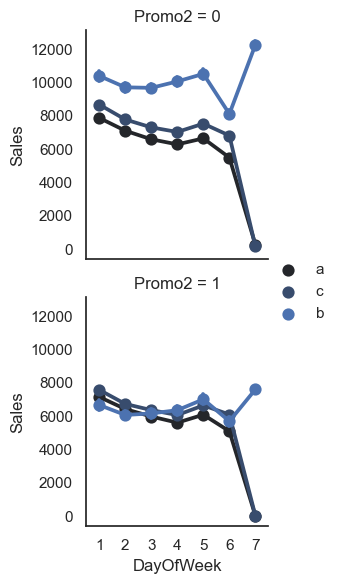

In [155]:
g=sns.FacetGrid(df_train, row="Promo2")
g.map(sns.pointplot, "DayOfWeek", "Sales", "Assortment")
g.add_legend()
plt.show()

Effect of days of the week on sales by product type
Here we can see that the best selling products are type b products. We see that stores selling type B products are open on Sundays, while stores selling other products are closed on Sundays.

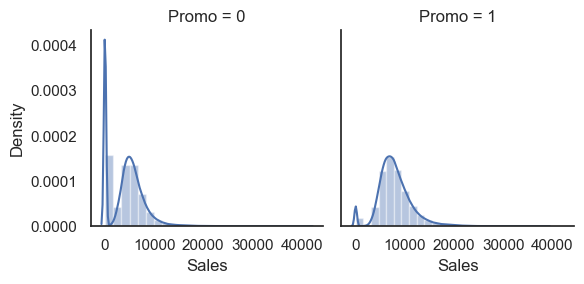

In [156]:
g=sns.FacetGrid(df_train, col="Promo")
g.map(sns.distplot, "Sales", bins=25)
plt.show()

Distribution of sales when there is a campaign and when there is no campaign
Sales density and average increase in the campaign organized by the store itself.

In [157]:
df_train.drop(["CompetitionOpenSinceYear","CompetitionOpenSinceMonth","Promo2SinceYear","Promo2SinceWeek"],axis=1,inplace=True)
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'Day', 'Week',
       'Month', 'Year', 'Season', 'CompetitionOpen', 'PromoOpen',
       'SalesPerCustomer'],
      dtype='object')

In [158]:
nc=["Customers","CompetitionDistance","CompetitionOpen","PromoOpen","SalesPerCustomer"] # numerical
kc=["DayOfWeek","StateHoliday","SchoolHoliday", "StoreType","Assortment","Open","Promo","Promo2","Week","Month","Year","Season","PromoInterval"] # category

In [159]:
m={0:"0","0":"0","a":"a","b":"b","c":"c"}
df_train["StateHoliday"]=df_train["StateHoliday"].map(m)

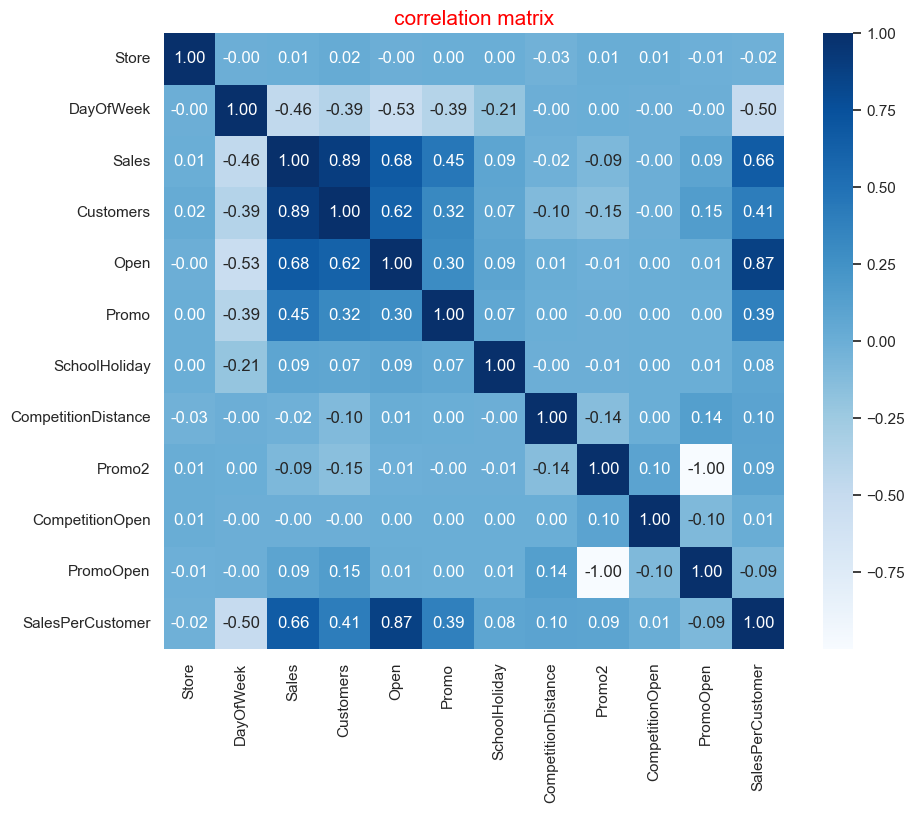

In [160]:
df_corr=df_train.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(10,8))
plt.title("correlation matrix", color="red", fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues", fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

SalesPer has a high correlation with Customers Open. Let's remove the SalesPer Customers variable from our data set:

In [161]:
df_train.drop("SalesPerCustomer",axis=1,inplace=True)

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
 1

In [163]:
df_train.drop("Date",axis=1,inplace=True)

In [164]:
nc=["Customers","CompetitionDistance","CompetitionOpen","PromoOpen",] # numerical
kc=["DayOfWeek","StateHoliday","SchoolHoliday", "StoreType","Assortment","Open","Promo","Promo2","Week","Month","Year","Season","PromoInterval"]

In [165]:
df_train["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [166]:
m2={0:"0","Jan,Apr,Jul,Oct":"Jan,Apr,Jul,Oct","Feb,May,Aug,Nov":"Feb,May,Aug,Nov","Mar,Jun,Sept,Dec":"Mar,Jun,Sept,Dec"}
df_train["PromoInterval"]=df_train["PromoInterval"].map(m2)

In [167]:
df_train[kc]=df_train[kc].astype("object")
le=LabelEncoder()
df_train.update(df_train[kc].apply(le.fit_transform))
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Day,Week,Month,Year,Season,CompetitionOpen,PromoOpen
0,1,4,5263,555,1,1,0,1,2,0,1270.0,0,0,31,30,6,2,2,82.0,24187.75
1,2,4,6064,625,1,1,0,1,0,0,570.0,1,2,31,30,6,2,2,92.0,64.5
2,3,4,8314,821,1,1,0,1,0,0,14130.0,1,2,31,30,6,2,2,103.0,52.25
3,4,4,13995,1498,1,1,0,1,2,2,620.0,0,0,31,30,6,2,2,70.0,24187.75
4,5,4,4822,559,1,1,0,1,0,0,29910.0,0,0,31,30,6,2,2,3.0,24187.75


In [168]:
cols=df_train.columns.tolist()
cols.remove("Sales")
cols

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'PromoInterval',
 'Day',
 'Week',
 'Month',
 'Year',
 'Season',
 'CompetitionOpen',
 'PromoOpen']

In [169]:
scaler = StandardScaler()
df_train[cols]=scaler.fit_transform(df_train[cols])
df_train.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Day,Week,Month,Year,Season,CompetitionOpen,PromoOpen
0,-1.731640,0.501484,5263,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.537839,-1.001128,-0.906156,1.740766,0.511626,0.346724,1.502077,0.389712,-0.680711,1.002430
1,-1.728534,0.501484,6064,-0.017540,0.452399,1.273237,-0.159217,2.144211,-0.884348,-0.940975,-0.628632,0.998873,0.942483,1.740766,0.511626,0.346724,1.502077,0.389712,-0.679820,-0.995593
2,-1.725427,0.501484,8314,0.404499,0.452399,1.273237,-0.159217,2.144211,-0.884348,-0.940975,1.130167,0.998873,0.942483,1.740766,0.511626,0.346724,1.502077,0.389712,-0.678841,-0.996607
3,-1.722321,0.501484,13995,1.862258,0.452399,1.273237,-0.159217,2.144211,0.580451,1.071502,-0.622147,-1.001128,-0.906156,1.740766,0.511626,0.346724,1.502077,0.389712,-0.681780,1.002430
4,-1.719214,0.501484,4822,-0.159656,0.452399,1.273237,-0.159217,2.144211,-0.884348,-0.940975,3.176912,-1.001128,-0.906156,1.740766,0.511626,0.346724,1.502077,0.389712,-0.687747,1.002430


In [170]:
y=df_train["Sales"]
X=df_train.drop("Sales",axis=1)

# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [171]:
models=["DecisionTreeRegressor","BaggingRegressor","RandomForestRegressor","GradientBoostingRegressor"]
regresions=[DecisionTreeRegressor(random_state=0),BaggingRegressor(random_state=0),RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0)]
# For hiperparameter tuning
params={
    models[0]:{"min_samples_split":range(2,25),"max_leaf_nodes":range(2,25)},
    models[1]:{"n_estimators":range(2,25)},
    models[2]:{"max_depth":range(2,25),"max_features":range(2,25),"n_estimators":range(2,25)},
    models[3]:{"learning_rate":[0.001,0.01],"n_estimators":range(2,25),"min_samples_split":range(2,25),"max_depth":range(2,10)}
}

In [173]:
for i,j in zip(models,regresions):
    cv_results = cross_validate(j, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error'])
    print("############# {} ##############".format(i))
    print("R_score: {}".format(round(cv_results["test_r2"].mean(),2)))
    print("RMSE: {}".format(round(cv_results["test_neg_mean_squared_error"].mean(),2)))

KeyboardInterrupt: 

Bagging, random forest, and gradient boosting algorithms gave us strong results. Since we train the data piece by piece in each model, we can say that there is no overfitting problem based on the results. Let's apply hyperparameter optimization to gradient boosting and random forest models. Because the data set is large in size, the optimization process for all of them will create great time costs.

In [ ]:
models=["RandomForestRegressor","GradientBoostingRegressor"]
regresions=[RandomForestRegressor(random_state=0)]
# For hiperparameter tuning
params={
    models[0]:{"max_depth":np.arange(2,10,3),"max_features":np.arange(2,10,3),"n_estimators":np.arange(5,26,5)},
    }

def solution(model):
    model.fit(X_train,y_train)
    return model

def score(model2):
    predict=solution(model2).predict(X_test)
    r2=mt.r2_score(y_test,predict)
    rmse=mt.mean_squared_error(y_test,predict,squared=True)
    return [r2,rmse]

In [ ]:
for i,j in zip(models,regresions):
    print(i)
    grid=GridSearchCV(solution(j),params[i],cv=3)
    grid.fit(X_train,y_train)
    print(grid.best_params_)

In [ ]:
models2=["RandomForestRegressor No optimization","GradientBoostingRegressor No optimization","RandomForestRegressor","GradientBoostingRegressor"]
regression2=[RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0),
             RandomForestRegressor(random_state=0,max_depth=8,max_features=8,n_estimators=10),
             GradientBoostingRegressor(random_state=0,learning_rate=0.01,max_depth=8,min_samples_split=2,n_estimators=8)]

results=[]
for i in regression2:
    results.append(score(i))

In [ ]:
df=pd.DataFrame(models2,columns=["Model Name"])
df["Results"]=results
df

In [ ]:
rfmodel=RandomForestRegressor(random_state=0)
rfmodel.fit(X_train,y_train)
rfpredict=rfmodel.predict(X_test)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(range(len(y_test[:50])),y_test[:50],label="Orginal")
plt.plot(range(len(y_test[:50])),rfpredict[:50],label="Predict")
plt.title("Rossman RandomForestRegressor Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Observe No")
plt.legend()
plt.show()

In [ ]:
rscore_rf=mt.r2_score(y_test, rfpredict)
rmse_rf = np.sqrt(mt.mean_squared_error(y_test, rfpredict))
print("R2 for RF:", rscore_rf)
print("Root Mean Squared Error for RF:", rmse_rf)

TIMES SERIES 

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from prophet import Prophet

In [85]:
df_train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")
df_train.head()

C:\Users\yugas\AppData\Local\Temp\ipykernel_10380\1290770497.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [48]:
df_store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [32]:
df_train['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [33]:
print('Total number of stores: {}'.format(len(df_train)))
print('Total number of open stores: 844392')
print('Total number of closed stores: 172817')

Total number of stores: 1017209
Total number of open stores: 844392
Total number of closed stores: 172817


In [49]:
df_train = df_train[df_train['Open']==1]

In [50]:
df_train.drop('Open',axis=1,inplace=True)

In [51]:
df_store['CompetitionDistance'].isnull().sum()
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(),inplace=True)

C:\Users\yugas\AppData\Local\Temp\ipykernel_10380\260006952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(),inplace=True)


In [52]:
df_store['CompetitionOpenSinceMonth'].isnull().sum()

354

In [53]:
df_store.fillna(0,inplace=True)


In [54]:
merged_df = pd.merge(df_train,df_store,how='inner',on='Store')
merged_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
570069,636,3,2013-10-23,5835,673,1,0,0,c,a,720.0,10.0,2004.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
517325,753,3,2013-12-18,13293,988,1,0,0,d,c,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
291620,510,6,2014-08-30,5578,559,0,0,0,a,c,8260.0,0.0,0.0,0,0.0,0.0,0
598921,303,6,2013-09-21,3797,476,0,0,0,a,a,15430.0,11.0,2012.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
652046,1062,1,2013-07-29,10686,818,1,0,1,d,a,190.0,9.0,2012.0,1,40.0,2012.0,"Feb,May,Aug,Nov"


In [55]:
merged_df['Year'] = pd.DatetimeIndex(merged_df['Date']).year
merged_df['Month'] = pd.DatetimeIndex(merged_df['Date']).month
merged_df['Day'] = pd.DatetimeIndex(merged_df['Date']).day
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


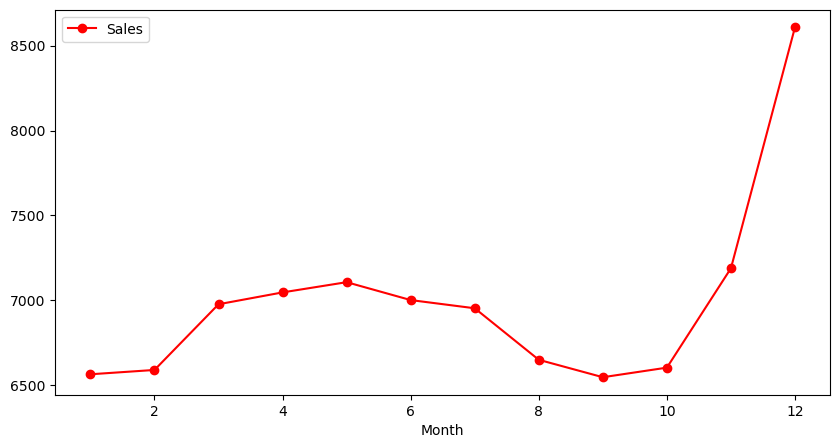

<Figure size 640x480 with 0 Axes>

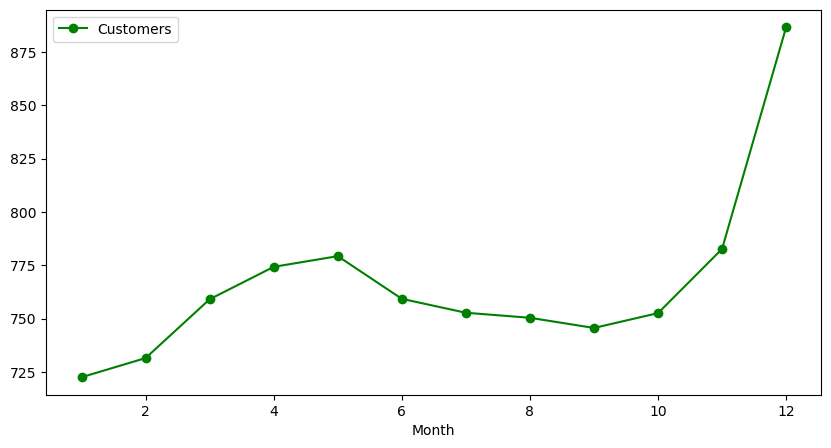

In [56]:
axis = merged_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = merged_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='g')

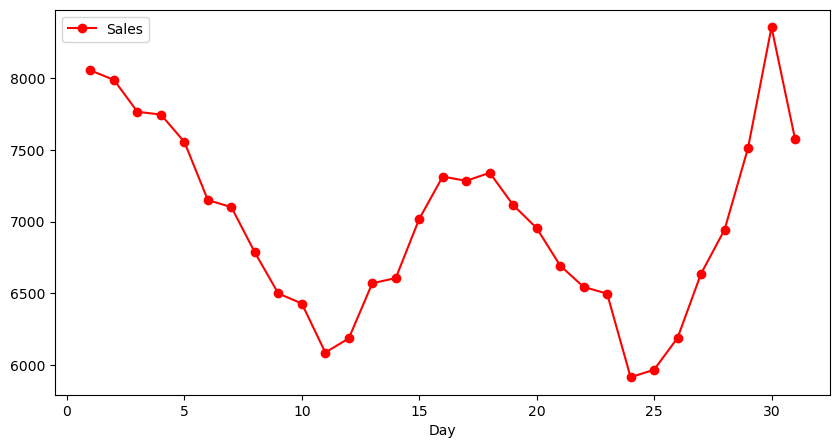

<Figure size 640x480 with 0 Axes>

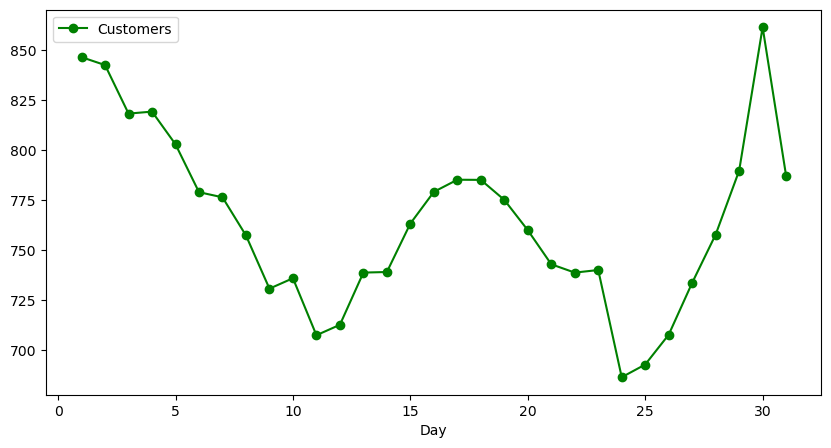

In [57]:
axis = merged_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = merged_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='g')

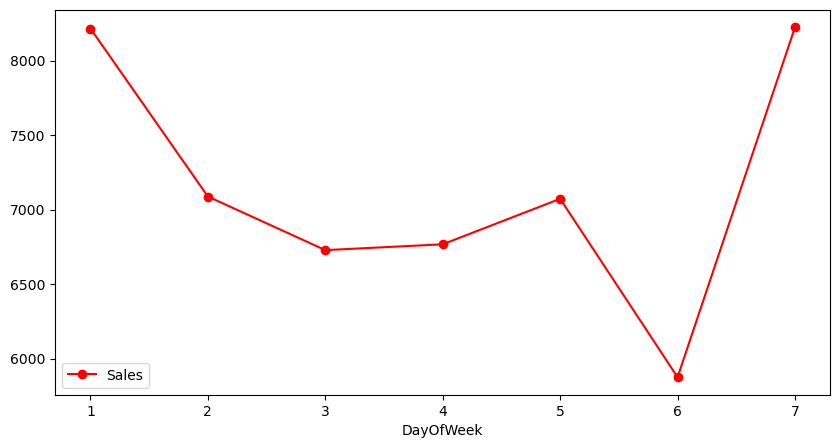

<Figure size 640x480 with 0 Axes>

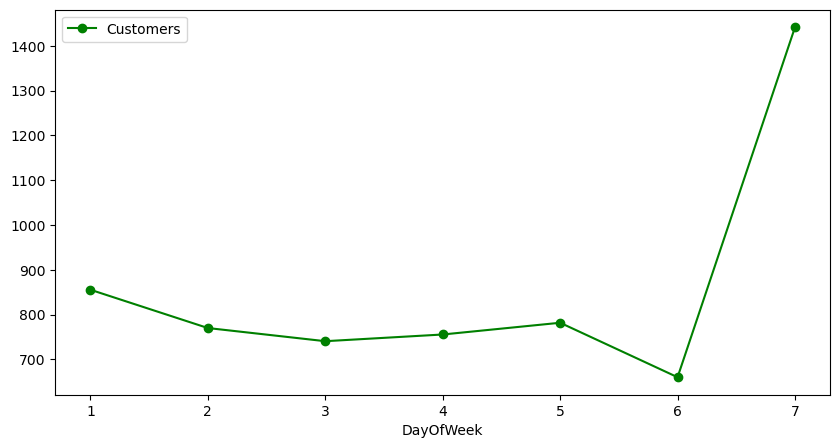

In [17]:
axis = merged_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = merged_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5),marker='o',color='g')


In [83]:
def sales_prediction(Store_ID, sales_df, periods):
  # Function that takes in the data frame, storeID, and number of future period forecast
  # The function then generates date/sales columns in Prophet format
  # The function then makes time series predictions

    sales_df = sales_df[ sales_df['Store'] == Store_ID ]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')
  
    model  = Prophet()
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2  = model.plot_components(forecast)


13:47:28 - cmdstanpy - INFO - Chain [1] start processing
13:47:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yugas\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\yugas\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\yugas\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

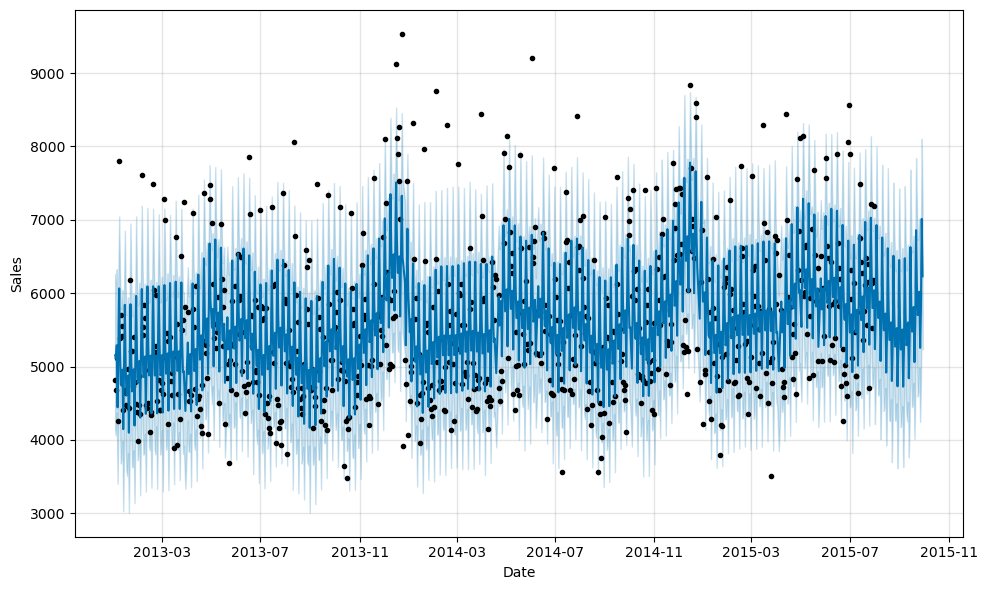

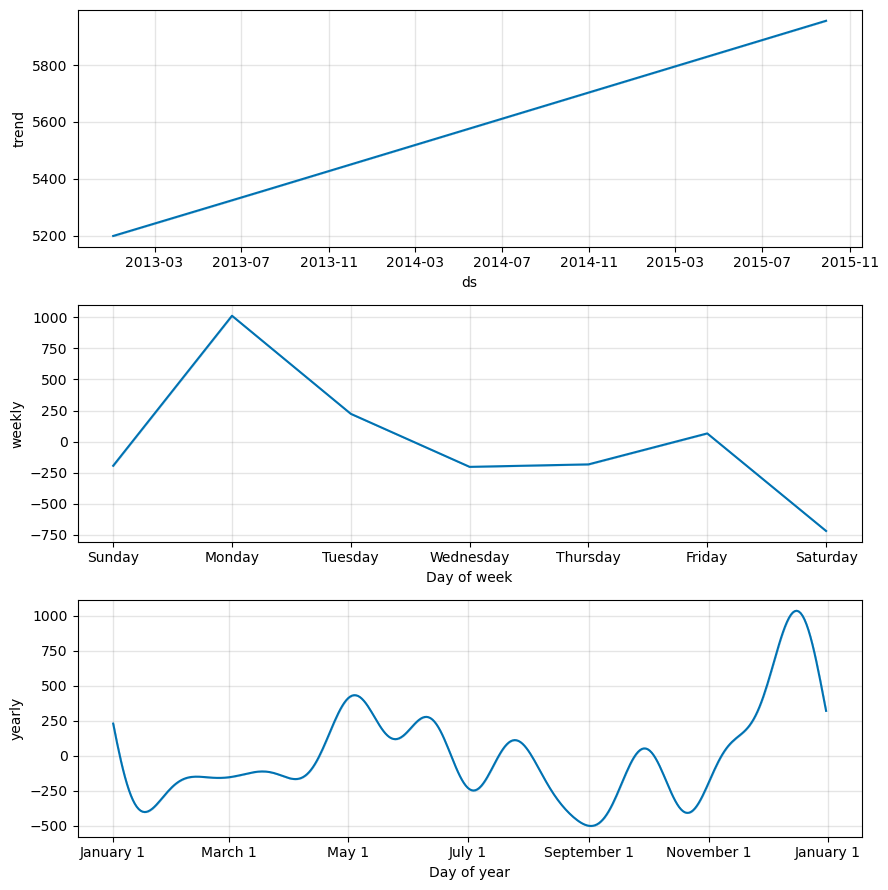

In [20]:
sales_prediction(10, merged_df, 60)

StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [21]:
def sales_prediction_better(Store_ID, sales_df, holidays, periods):

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

In [77]:
school_holidays = merged_df[merged_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape


(163457,)

In [78]:
state_holidays = merged_df[ (merged_df['StateHoliday'] == 'a') | (merged_df['StateHoliday'] == 'b') | (merged_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [79]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [80]:
school_state_holidays = pd.concat((state_holidays, school_holidays))

13:49:28 - cmdstanpy - INFO - Chain [1] start processing
13:49:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yugas\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\yugas\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\yugas\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

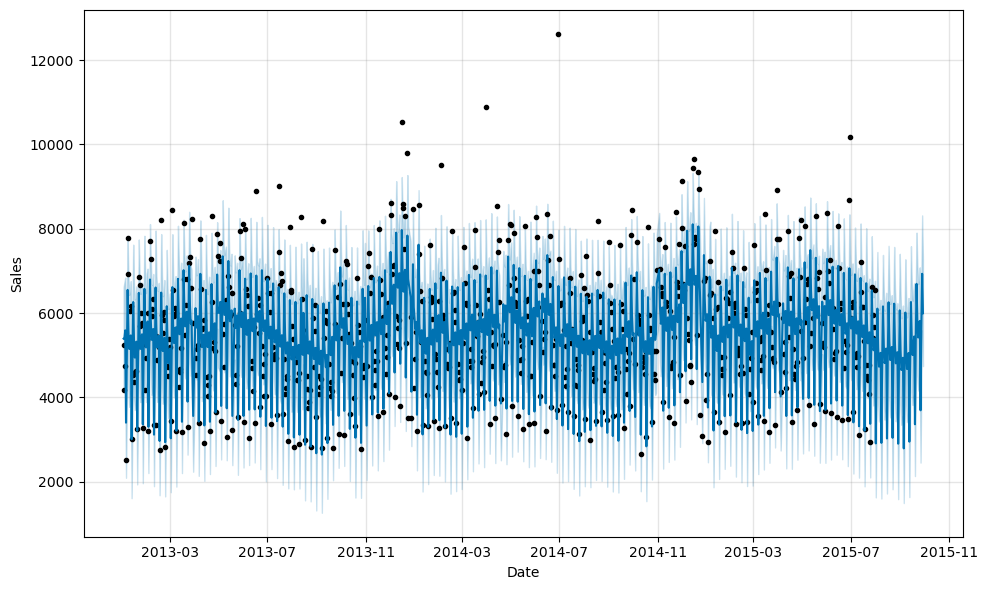

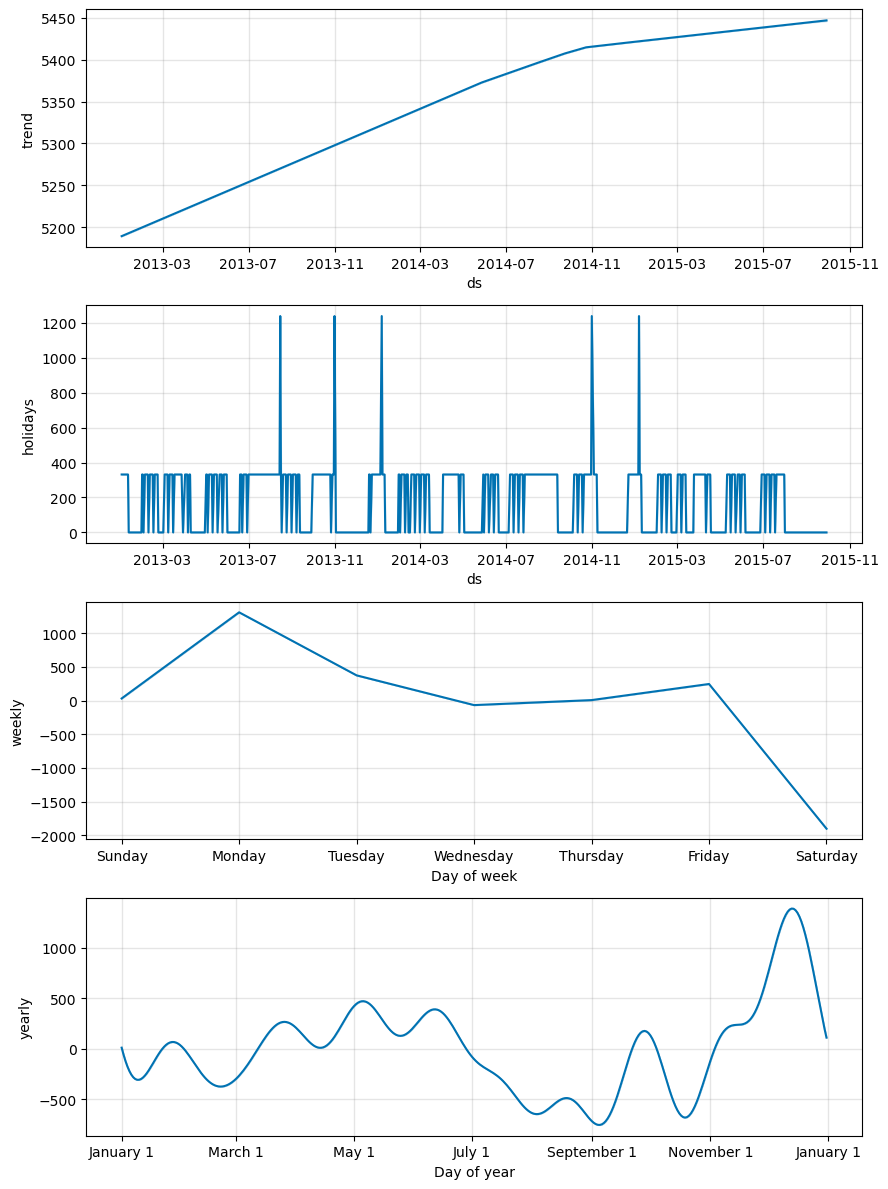

In [25]:
sales_prediction_better(14, merged_df, school_state_holidays, 60)

In [ ]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/train.csv")
store = pd.read_csv("C:/Users/yugas/OneDrive/Desktop/rohan final/store.csv")
merged_df = train.merge(store, on="Store", how="left")

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

def sales_prediction_with_accuracy(Store_ID, sales_df, holidays, periods):

    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')
    
    train_data = sales_df[:-periods]  
    test_data = sales_df[-periods:]   
    model = Prophet(holidays=holidays)
    model.fit(train_data)
    
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    
    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)
    
    test_forecast = forecast[-periods:][['ds', 'yhat']]  
    

    rmse = np.sqrt(mean_squared_error(test_data['y'], test_forecast['yhat']))
    r2 = r2_score(test_data['y'], test_forecast['yhat'])
    

    mape = np.mean(np.abs((test_data['y'] - test_forecast['yhat']) / test_data['y'])) * 100
    
    accuracy_percentage = r2 * 100
    
    return figure, figure2, rmse, r2, mape, accuracy_percentage

state_holidays = merged_df[(merged_df['StateHoliday'] == 'a') | (merged_df['StateHoliday'] == 'b') | (merged_df['StateHoliday'] == 'c')]
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays['Date']), 'holiday': 'state_holiday'})

school_holidays = merged_df[merged_df['SchoolHoliday'] == 1]
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays['Date']), 'holiday': 'school_holiday'})

school_state_holidays = pd.concat([state_holidays, school_holidays])

figure, figure2, rmse, r2, mape, accuracy_percentage = sales_prediction_with_accuracy(14, merged_df, school_state_holidays, periods=60)


In [74]:

print(f"Prophet Model RMSE: {rmse}")
print(f"Prophet Model R²: {r2}")
print(f"Prophet Model MAPE: {mape:.2f}%")
print(f"Prophet Model Accuracy Percentage (R²): {accuracy_percentage:.2f}%")


Prophet Model RMSE: 946.6145990579932
Prophet Model R²: 0.8389629126115693
Prophet Model MAPE: nan%
Prophet Model Accuracy Percentage (R²): 83.90%
